<a href="https://colab.research.google.com/github/cindy1404hsieh/Ciencia-de-Datos/blob/main/tp2_analisis_y_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Traer dataframes

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
sales_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/sales_train.csv', parse_dates = ['date'])
test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/test.csv')
items = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/items.csv')
item_categories = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/item_categories.csv')
shops = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/shops.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/sample_submission.csv')

# Analisis exploratorio

##head

In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


##analisis de sales_train

In [ ]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [ ]:
sales_train[sales_train['item_price'] <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [ ]:
sales_train=sales_train[sales_train['item_price'] > 0]

In [ ]:
sales_train['item_cnt_day'].value_counts()

item_cnt_day
1.0       2629371
2.0        194201
3.0         47350
4.0         19685
5.0         10474
           ...   
251.0           1
501.0           1
112.0           1
164.0           1
2169.0          1
Name: count, Length: 198, dtype: int64

In [ ]:
sales_train.loc[sales_train['item_cnt_day'] < 0, ['item_cnt_day']]['item_cnt_day'].value_counts()

item_cnt_day
-1.0     7252
-2.0       78
-3.0       14
-5.0        4
-4.0        3
-6.0        2
-22.0       1
-16.0       1
-9.0        1
Name: count, dtype: int64

In [ ]:
sales_train_filtered = sales_train.loc[sales_train['item_cnt_day'] > 0, :]
sales_train_filtered

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


Casteamos la columna date al tipo datetime

In [ ]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


Sacamos las filas que tiene numero de ventas por dia negativos

Deslozamos la fecha en mes y año

In [ ]:
sales_train_filtered = sales_train.copy()

In [ ]:
sales_train_filtered['month'] = sales_train_filtered['date'].dt.month
sales_train_filtered['year'] = sales_train_filtered['date'].dt.year
sales_train_filtered['day'] = sales_train_filtered['date'].dt.day
sales_train_filtered['day_of_the_week'] = sales_train_filtered['date'].dt.day_name()

Vemos si hay filas duplicadas

In [ ]:
sales_train_filtered.duplicated().value_counts()

False    2935842
True           6
Name: count, dtype: int64

Efectivamente hay, las eliminamos

In [ ]:
sales_train_filtered = sales_train_filtered.drop_duplicates()
len(sales_train_filtered)

2935842

Agregamos numero de ventas por mes para cada conjunto de vendedor e item

In [ ]:
sales_train_filtered['item_cnt_month'] = sales_train_filtered.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].transform('sum')
sales_train_filtered

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,day_of_the_week,item_cnt_month
0,2013-01-02,0,59,22154,999.00,1.0,1,2013,2,Wednesday,1.0
1,2013-01-03,0,25,2552,899.00,1.0,1,2013,3,Thursday,0.0
2,2013-01-05,0,25,2552,899.00,-1.0,1,2013,5,Saturday,0.0
3,2013-01-06,0,25,2554,1709.05,1.0,1,2013,6,Sunday,1.0
4,2013-01-15,0,25,2555,1099.00,1.0,1,2013,15,Tuesday,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,10,2015,10,Saturday,3.0
2935845,2015-10-09,33,25,7460,299.00,1.0,10,2015,9,Friday,3.0
2935846,2015-10-14,33,25,7459,349.00,1.0,10,2015,14,Wednesday,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0,10,2015,22,Thursday,1.0


## outliers


analizamos los precios

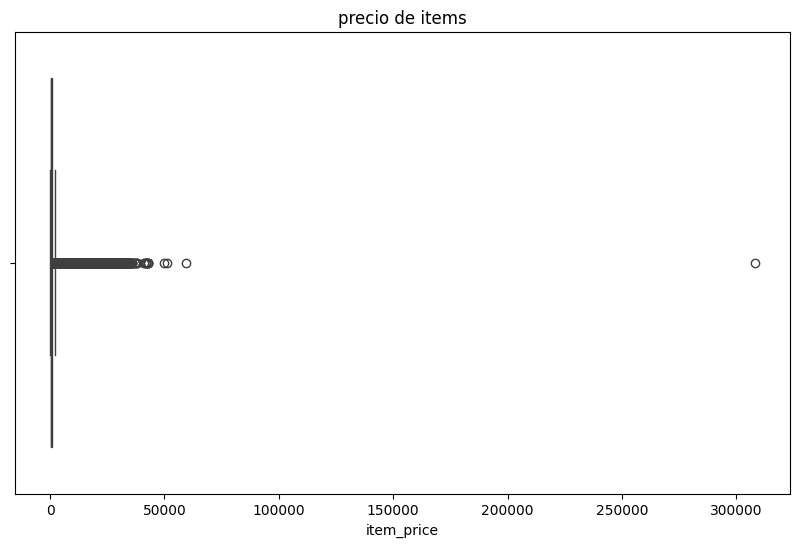

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_train_filtered['item_price'])
plt.title('precio de items')
plt.show()

analizamos item_cnt_day

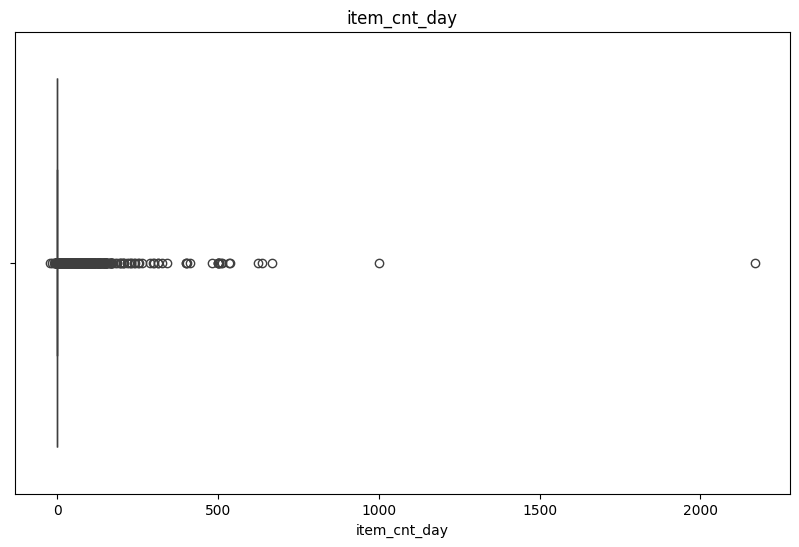

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_train_filtered['item_cnt_day'])
plt.title('item_cnt_day')
plt.show()

sacamos los outliers

In [ ]:
sales_train_filtered = sales_train_filtered[(sales_train_filtered["item_price"] < 50001)]
sales_train_filtered = sales_train_filtered[(sales_train_filtered["item_cnt_day"] > 0) & (sales_train_filtered["item_cnt_day"] < 1001)]
sales_train_filtered.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,day_of_the_week,item_cnt_month
0,2013-01-02,0,59,22154,999.00,1.0,1,2013,2,Wednesday,1.0
1,2013-01-03,0,25,2552,899.00,1.0,1,2013,3,Thursday,0.0
3,2013-01-06,0,25,2554,1709.05,1.0,1,2013,6,Sunday,1.0
4,2013-01-15,0,25,2555,1099.00,1.0,1,2013,15,Tuesday,1.0
5,2013-01-10,0,25,2564,349.00,1.0,1,2013,10,Thursday,1.0


##analisis de shops


notamos que la primera palabra es la ciudad

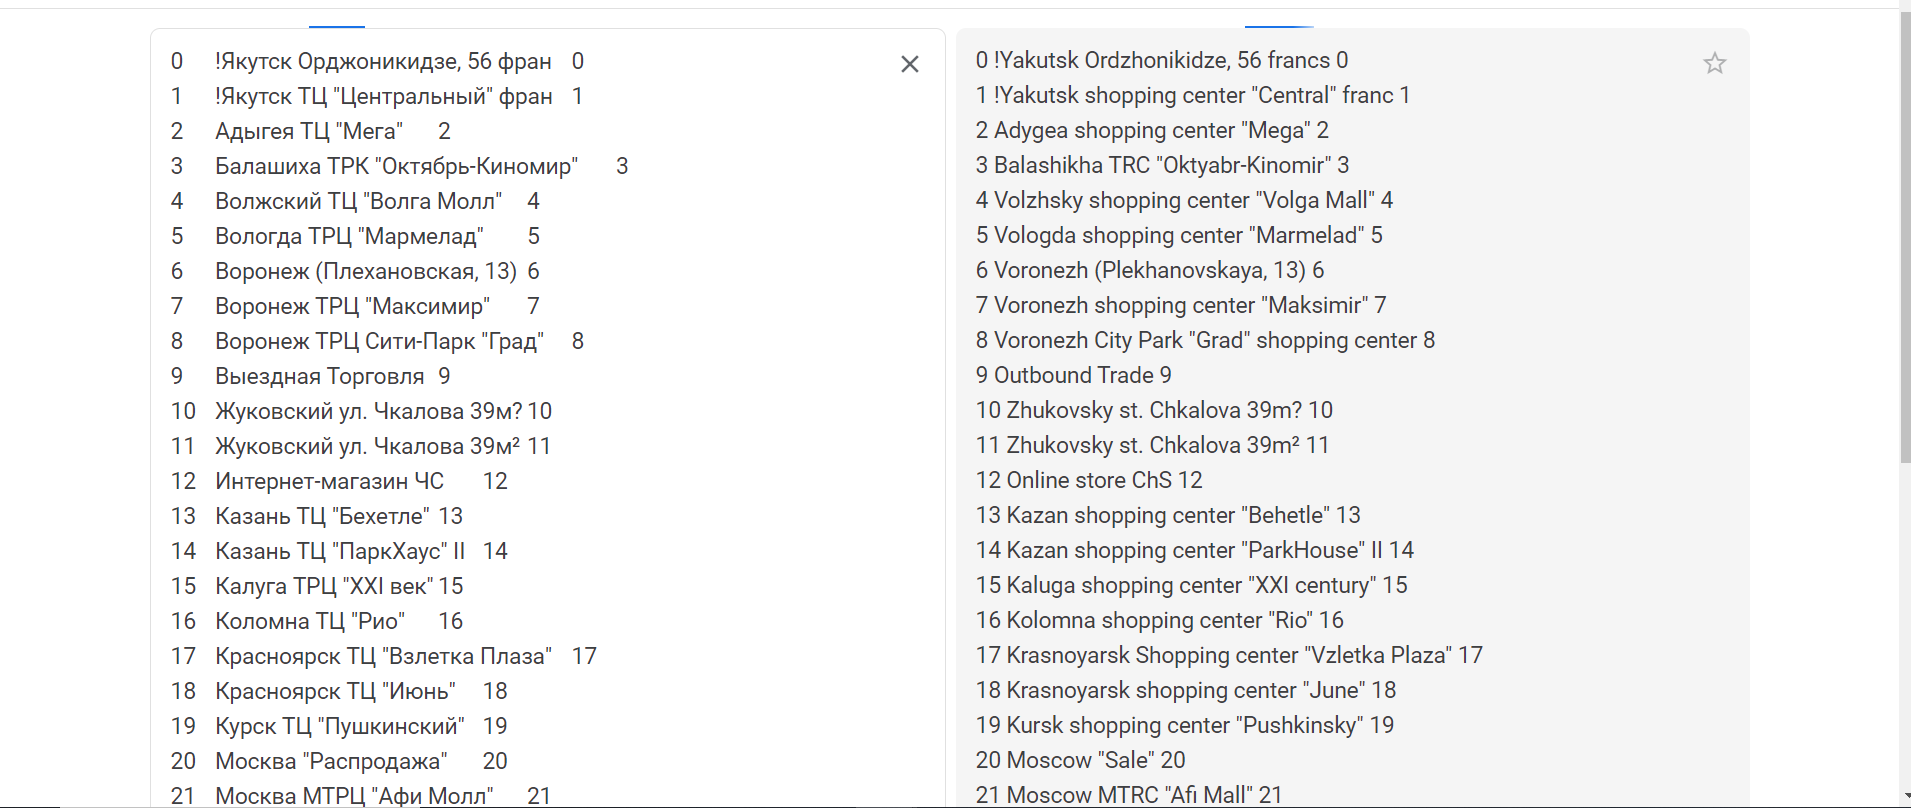

transformamos esos nombres de ciudades en valores numericos usando label encoding

In [ ]:
shops['city'] = shops['shop_name'].str.split().str[0]
label_encoder = LabelEncoder()
shops['city_code'] = label_encoder.fit_transform(shops['city'])
shops = shops.drop(columns=['city'])
shops.head()

,shop_name,shop_id,city_code
0,"!Якутск Орджоникидзе, 56 фран",0,0
1,"!Якутск ТЦ ""Центральный"" фран",1,0
2,"Адыгея ТЦ ""Мега""",2,1
3,"Балашиха ТРК ""Октябрь-Киномир""",3,2
4,"Волжский ТЦ ""Волга Молл""",4,3


##analisis de categorias

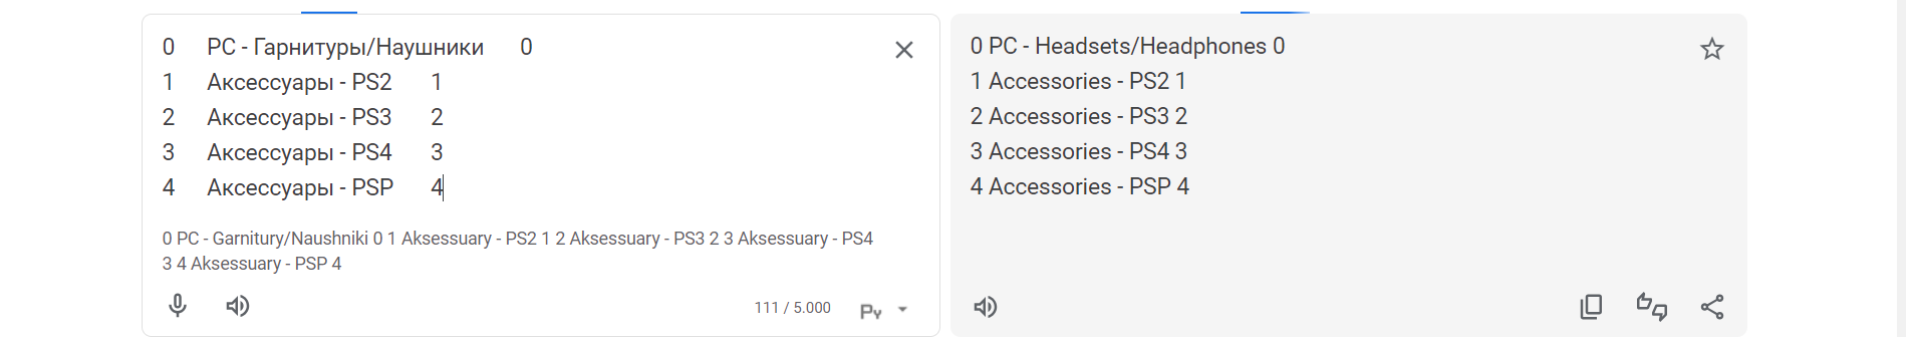

nos damos cuenta que la primera palabra es la categoria

In [ ]:
item_categories['parte_categoria'] = item_categories['item_category_name'].str.split('-')
item_categories['type'] = item_categories['parte_categoria'].map(lambda x: x[0].strip())
item_categories['type_code'] = LabelEncoder().fit_transform(item_categories['type'])
item_categories = item_categories[['item_category_id','type_code']]
item_categories.head()

,item_category_id,type_code
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


##mergeamos los datasets

In [ ]:
sales_train_filtered = sales_train_filtered.merge(shops, on='shop_id', how='left')
sales_train_filtered = sales_train_filtered.merge(items, on='item_id', how='left')
sales_train_filtered = sales_train_filtered.merge(item_categories, on='item_category_id', how='left')

In [ ]:
price_dates = sales_train_filtered.copy()

In [ ]:
sales_train_filtered = sales_train_filtered.drop(['date','shop_name','item_name'], axis=1)

Agregamos total de ventas historico por item

In [ ]:
sales_train_filtered['total_sales_item'] = sales_train_filtered.groupby(['item_id'])['item_cnt_day'].transform('sum')
sales_train_filtered

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,day_of_the_week,item_cnt_month,city_code,item_category_id,type_code,total_sales_item
0,0,59,22154,999.00,1.0,1,2013,2,Wednesday,1.0,31,37,11,59.0
1,0,25,2552,899.00,1.0,1,2013,3,Thursday,0.0,14,58,13,7.0
2,0,25,2554,1709.05,1.0,1,2013,6,Sunday,1.0,14,58,13,1.0
3,0,25,2555,1099.00,1.0,1,2013,15,Tuesday,1.0,14,56,13,56.0
4,0,25,2564,349.00,1.0,1,2013,10,Thursday,1.0,14,59,13,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928477,33,25,7409,299.00,1.0,10,2015,10,Saturday,3.0,14,55,13,17.0
2928478,33,25,7460,299.00,1.0,10,2015,9,Friday,3.0,14,55,13,117.0
2928479,33,25,7459,349.00,1.0,10,2015,14,Wednesday,1.0,14,55,13,569.0
2928480,33,25,7440,299.00,1.0,10,2015,22,Thursday,1.0,14,57,13,23.0


In [ ]:
sales_train_corr = sales_train_filtered.copy()

In [ ]:
sales_train_filtered['item_cnt_month'] = sales_train_filtered['item_cnt_month'].clip(0,20)
sales_train_filtered

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,day_of_the_week,item_cnt_month,city_code,item_category_id,type_code,total_sales_item
0,0,59,22154,999.00,1.0,1,2013,2,Wednesday,1.0,31,37,11,59.0
1,0,25,2552,899.00,1.0,1,2013,3,Thursday,0.0,14,58,13,7.0
2,0,25,2554,1709.05,1.0,1,2013,6,Sunday,1.0,14,58,13,1.0
3,0,25,2555,1099.00,1.0,1,2013,15,Tuesday,1.0,14,56,13,56.0
4,0,25,2564,349.00,1.0,1,2013,10,Thursday,1.0,14,59,13,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928477,33,25,7409,299.00,1.0,10,2015,10,Saturday,3.0,14,55,13,17.0
2928478,33,25,7460,299.00,1.0,10,2015,9,Friday,3.0,14,55,13,117.0
2928479,33,25,7459,349.00,1.0,10,2015,14,Wednesday,1.0,14,55,13,569.0
2928480,33,25,7440,299.00,1.0,10,2015,22,Thursday,1.0,14,57,13,23.0


# Plots

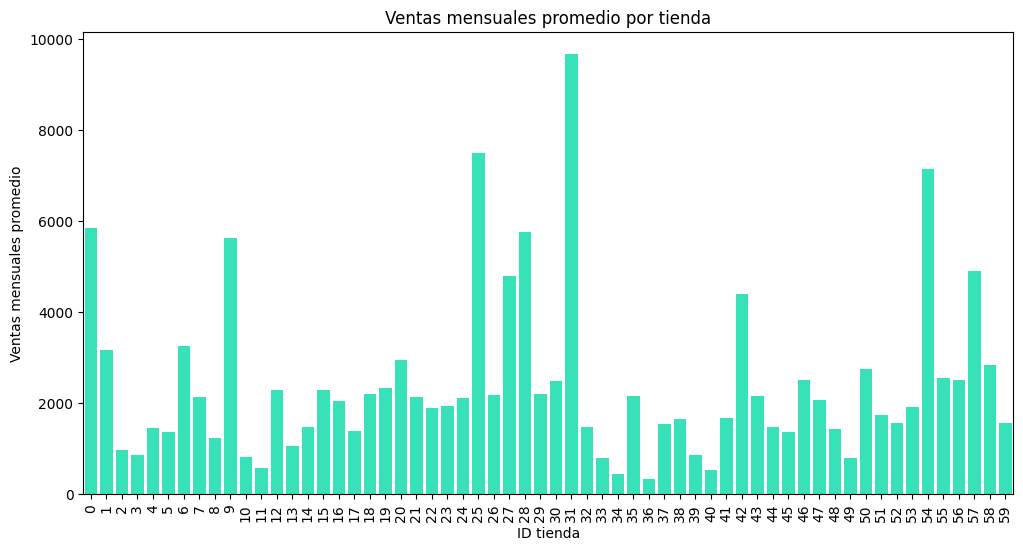

In [ ]:
a = sales_train_filtered.loc[: , ['date_block_num', 'shop_id', 'item_cnt_day']]
a['total_ventas_mes_vendedor'] = a.groupby(['date_block_num', 'shop_id'])['item_cnt_day'].transform('sum')

a = a.groupby(['shop_id'])['total_ventas_mes_vendedor'].mean().to_frame().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x = a['shop_id'], y = a['total_ventas_mes_vendedor'], color='#1BFEC7')
plt.title('Ventas mensuales promedio por tienda')
plt.xlabel('ID tienda')
plt.ylabel('Ventas mensuales promedio')
plt.xticks(rotation=90)

plt.show()

<ipython-input-35-8104b9a54e9e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'month', y='item_cnt_day',data=average_monthly_sales, palette='viridis')


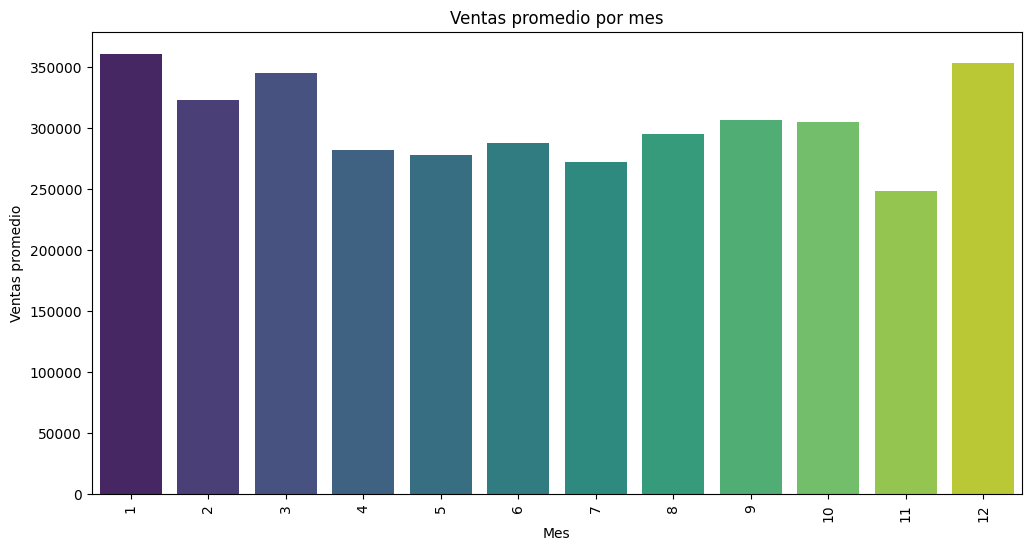

In [ ]:
average_monthly_sales = sales_train_filtered.groupby(['month'])['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x = 'month', y='item_cnt_day',data=average_monthly_sales, palette='viridis')
plt.title('Ventas promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas promedio')
plt.xticks(rotation=90)

plt.show()

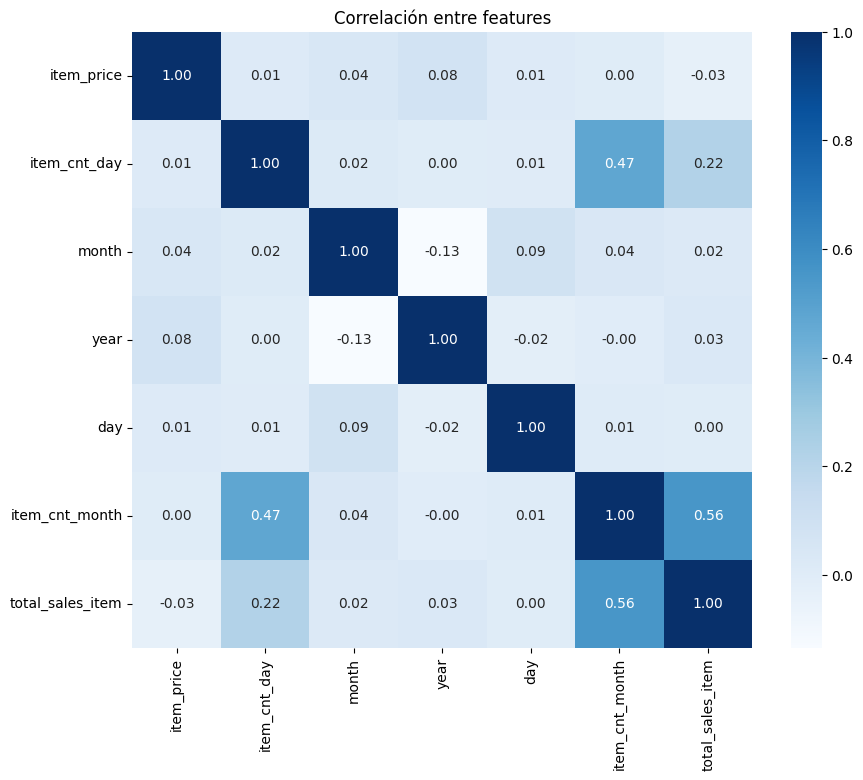

In [ ]:
c = sales_train_corr[['item_price',	'item_cnt_day',	'month', 'year', 'day', 'item_cnt_month', 'total_sales_item']]
corr_matrix = c.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlación entre features')
plt.show()

Categorias con mas ventas totales

In [ ]:
a = sales_train_filtered.groupby(['item_category_id'])['item_cnt_day'].sum().to_frame().reset_index()

a.nlargest(5, 'item_cnt_day')

,item_category_id,item_cnt_day
40,40,634884.0
30,30,457359.0
55,55,349050.0
19,19,255756.0
37,37,204030.0


<ipython-input-38-bc2ab78f159c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='item_category_id', y='item_cnt_day', data=a, palette='viridis')


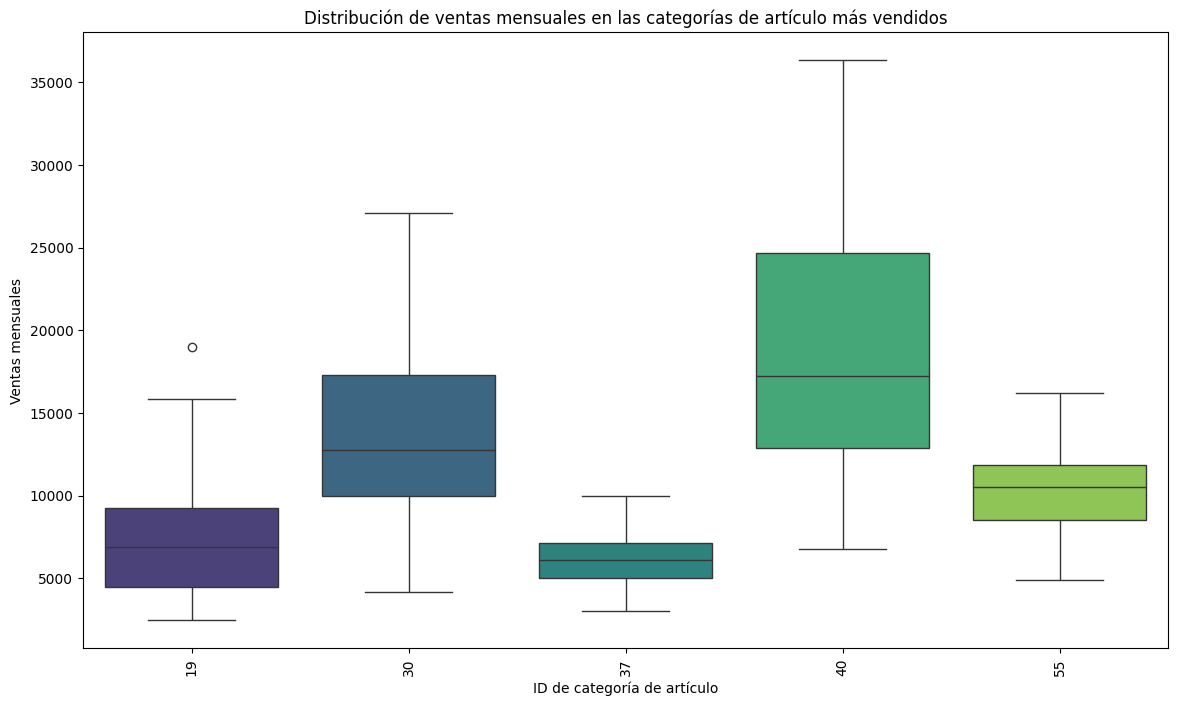

In [ ]:
a = sales_train_filtered.groupby(['item_category_id', 'date_block_num'])['item_cnt_day'].sum().to_frame().reset_index()

a = a.loc[(a['item_category_id'] == 40) | (a['item_category_id'] == 30) | (a['item_category_id'] == 55) | (a['item_category_id'] == 19) | (a['item_category_id'] == 37), :]

plt.figure(figsize=(14, 8))
sns.boxplot(x='item_category_id', y='item_cnt_day', data=a, palette='viridis')
plt.title('Distribución de ventas mensuales en las categorías de artículo más vendidos')
plt.xlabel('ID de categoría de artículo')
plt.ylabel('Ventas mensuales')
plt.xticks(rotation=90)
plt.show()

<ipython-input-39-78933c47caa3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='shop_id', y='item_cnt_day', data=shop_sales, palette='viridis', scale='width')
<ipython-input-39-78933c47caa3>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='shop_id', y='item_cnt_day', data=shop_sales, palette='viridis', scale='width')


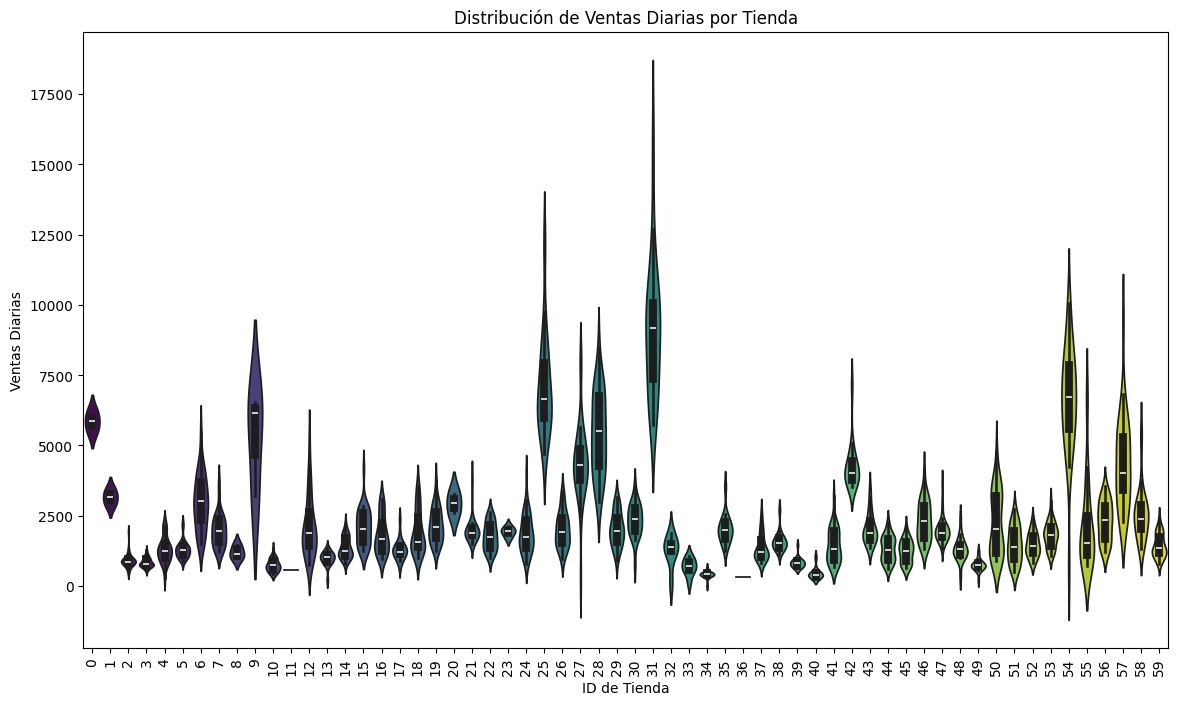

In [ ]:
shop_sales = sales_train_filtered.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.violinplot(x='shop_id', y='item_cnt_day', data=shop_sales, palette='viridis', scale='width')
plt.title('Distribución de Ventas Diarias por Tienda')
plt.xlabel('ID de Tienda')
plt.ylabel('Ventas Diarias')
plt.xticks(rotation=90)
plt.show()

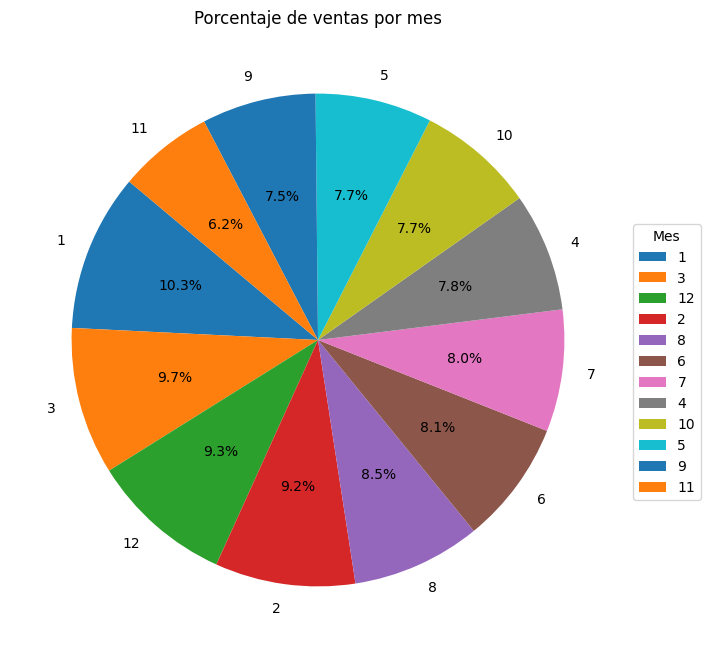

In [ ]:
value_counts = sales_train_filtered['month'].value_counts()
month_percent = (value_counts / len(sales_train_filtered)) * 100
t = pd.DataFrame({'all_months': value_counts.index, 'month_percent': month_percent.values}).reset_index(drop=True)
t

plt.figure(figsize=(8, 8))
plt.pie(t['month_percent'], labels=t['all_months'], autopct='%1.1f%%', startangle=140)

plt.title('Porcentaje de ventas por mes')
plt.legend(title='Mes', loc='best', bbox_to_anchor=(1.0, 0.7))
plt.show()

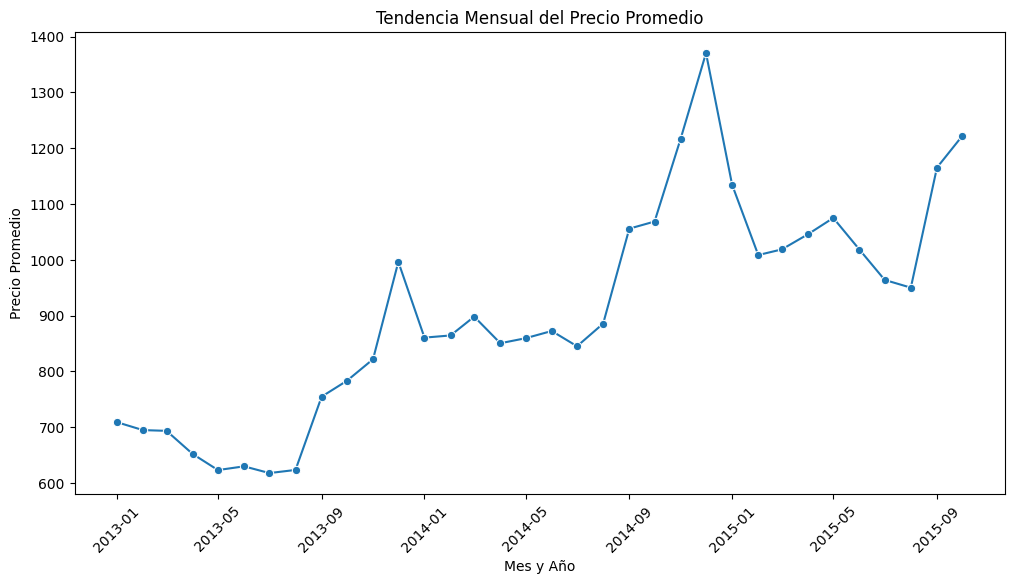

In [ ]:
price_dates['month_year'] = price_dates['date'].dt.to_period('M')
price_dates = price_dates.groupby('month_year')['item_price'].mean().to_frame().reset_index()

price_dates['month_year'] = price_dates['month_year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='item_price', data=price_dates, marker='o')
plt.title('Tendencia Mensual del Precio Promedio')
plt.xlabel('Mes y Año')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

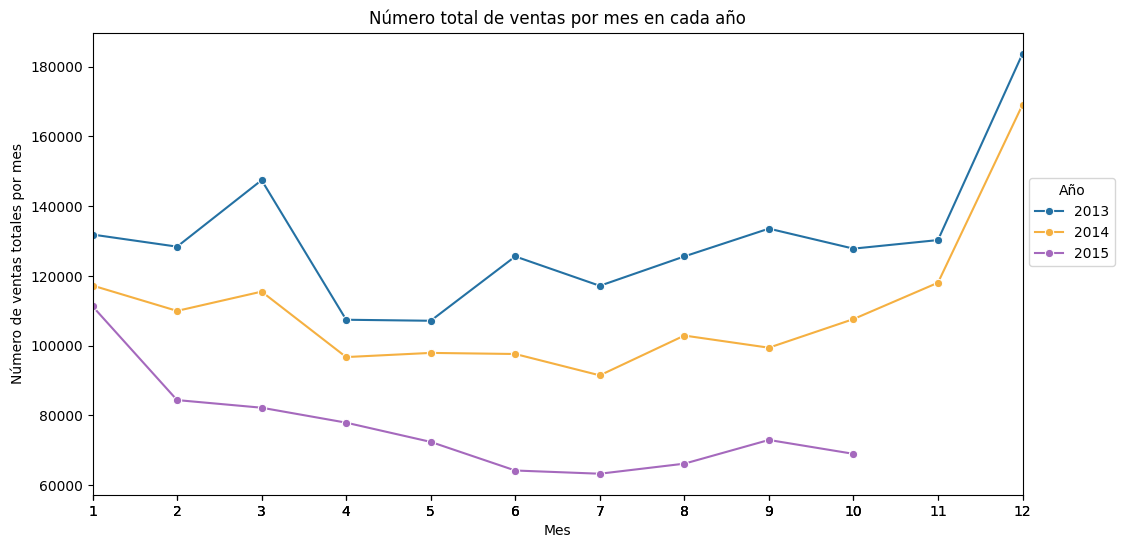

In [ ]:
a = sales_train_filtered.loc[:, ['year', 'month', 'item_cnt_day']]
a = a.groupby(['year', 'month'])['item_cnt_day'].sum().to_frame().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='item_cnt_day', data=a.loc[a['year'] == 2013], marker='o', label='2013', color = '#2471A3')
sns.lineplot(x='month', y='item_cnt_day', data=a.loc[a['year'] == 2014], marker='o',label='2014', color = '#F5B041')
sns.lineplot(x='month', y='item_cnt_day', data=a.loc[a['year'] == 2015], marker='o',label='2015', color = '#A569BD')

plt.legend(title='Año', loc='best', bbox_to_anchor=(1.0, 0.7))

plt.title('Número total de ventas por mes en cada año')
plt.xlabel('Mes')
plt.ylabel('Número de ventas totales por mes')
plt.xlim(1,12)
plt.xticks(a['month'])

plt.show()

(0.0, 100.0)

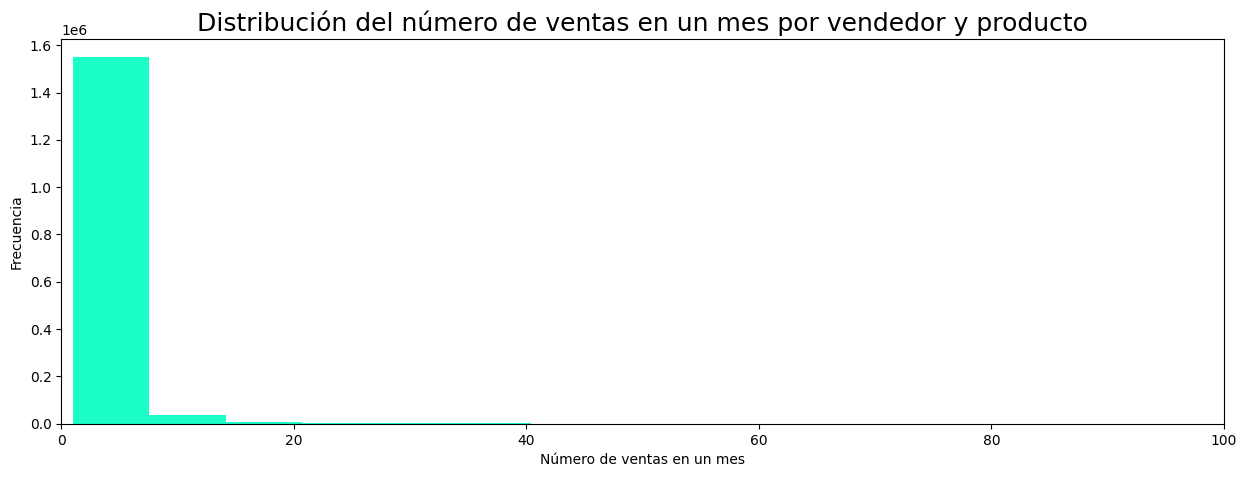

In [ ]:
a = sales_train_filtered.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum().to_frame().reset_index()

g=a['item_cnt_day'].plot.hist(figsize=(15,5), color='#1BFEC7', bins=250)
g.set_title('Distribución del número de ventas en un mes por vendedor y producto', fontsize=18)
g.set_xlabel('Número de ventas en un mes')
g.set_ylabel('Frecuencia')
g.set_xlim(0,100)

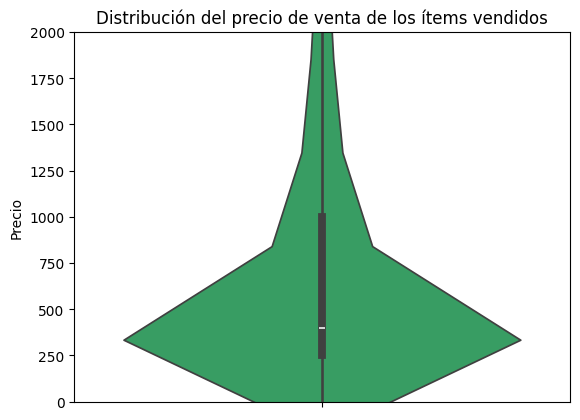

In [ ]:
sns.violinplot(y = "item_price", data=sales_train_filtered ,color = '#27AE60')
plt.title('Distribución del precio de venta de los ítems vendidos')
plt.ylabel('Precio')
plt.ylim(0,2000)
plt.show()

# Definimos set de entrenamiento, validacion

Para el train usamos los datos antes de Abril de 2015

para el validation usamos los datos de octubre el ultimo mes que tiene el set de datos

In [ ]:
X_train = sales_train_filtered.loc[sales_train_filtered['date_block_num'] < 27, :].drop(columns=['item_cnt_month'])
X_train

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,day_of_the_week,city_code,item_category_id,type_code,total_sales_item
0,0,59,22154,999.00,1.0,1,2013,2,Wednesday,31,37,11,59.0
1,0,25,2552,899.00,1.0,1,2013,3,Thursday,14,58,13,7.0
2,0,25,2554,1709.05,1.0,1,2013,6,Sunday,14,58,13,1.0
3,0,25,2555,1099.00,1.0,1,2013,15,Tuesday,14,56,13,56.0
4,0,25,2564,349.00,1.0,1,2013,10,Thursday,14,59,13,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547247,26,26,13888,349.00,1.0,3,2015,10,Tuesday,14,55,13,1479.0
2547248,26,26,13880,199.00,1.0,3,2015,12,Thursday,14,55,13,954.0
2547249,26,26,13923,169.00,1.0,3,2015,6,Friday,14,40,11,895.0
2547250,26,59,22164,749.00,1.0,3,2015,29,Sunday,31,37,11,494.0


In [ ]:
y_train = sales_train_filtered.loc[sales_train_filtered['date_block_num'] < 27, ['item_cnt_month']]
y_train

,item_cnt_month
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
2547247,1.0
2547248,2.0
2547249,3.0
2547250,1.0


Ahora el set de validacion

In [ ]:
X_validation = sales_train_filtered.loc[sales_train_filtered['date_block_num'] >= 27, :].drop(columns=['item_cnt_month'])
X_validation

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,day_of_the_week,city_code,item_category_id,type_code,total_sales_item
2547252,27,27,12020,399.0,1.0,4,2015,18,Saturday,14,40,11,1088.0
2547253,27,29,2734,699.0,1.0,4,2015,16,Thursday,14,19,5,501.0
2547254,27,29,2470,299.0,1.0,4,2015,25,Saturday,14,55,13,463.0
2547255,27,29,2698,3199.0,1.0,4,2015,8,Wednesday,14,20,5,240.0
2547256,27,29,2698,3199.0,1.0,4,2015,4,Saturday,14,20,5,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928477,33,25,7409,299.0,1.0,10,2015,10,Saturday,14,55,13,17.0
2928478,33,25,7460,299.0,1.0,10,2015,9,Friday,14,55,13,117.0
2928479,33,25,7459,349.0,1.0,10,2015,14,Wednesday,14,55,13,569.0
2928480,33,25,7440,299.0,1.0,10,2015,22,Thursday,14,57,13,23.0


In [ ]:
ohe_day_of_week = OneHotEncoder()
day_of_week_train = ohe_day_of_week.fit_transform(X_train[['day_of_the_week']]).todense().astype(int)

encoded_emb_test = ohe_day_of_week.transform(X_validation[['day_of_the_week']]).todense().astype(int)

In [ ]:
X_train = X_train.reset_index().drop(['index', 'day_of_the_week'],axis=1).join(pd.DataFrame(day_of_week_train))
X_validation = X_validation.reset_index().drop(['index', 'day_of_the_week'],axis=1).join(pd.DataFrame(encoded_emb_test))

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_validation.columns = X_validation.columns.astype(str)

In [ ]:
y_validation = sales_train_filtered.loc[sales_train_filtered['date_block_num'] >= 27, ['item_cnt_month']]
y_validation

,item_cnt_month
2547252,11.0
2547253,1.0
2547254,1.0
2547255,2.0
2547256,2.0
...,...
2928477,3.0
2928478,3.0
2928479,1.0
2928480,1.0


In [ ]:
X_train

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,city_code,item_category_id,type_code,total_sales_item,0,1,2,3,4,5,6
0,0,59,22154,999.00,1.0,1,2013,2,31,37,11,59.0,0,0,0,0,0,0,1
1,0,25,2552,899.00,1.0,1,2013,3,14,58,13,7.0,0,0,0,0,1,0,0
2,0,25,2554,1709.05,1.0,1,2013,6,14,58,13,1.0,0,0,0,1,0,0,0
3,0,25,2555,1099.00,1.0,1,2013,15,14,56,13,56.0,0,0,0,0,0,1,0
4,0,25,2564,349.00,1.0,1,2013,10,14,59,13,46.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547247,26,26,13888,349.00,1.0,3,2015,10,14,55,13,1479.0,0,0,0,0,0,1,0
2547248,26,26,13880,199.00,1.0,3,2015,12,14,55,13,954.0,0,0,0,0,1,0,0
2547249,26,26,13923,169.00,1.0,3,2015,6,14,40,11,895.0,1,0,0,0,0,0,0
2547250,26,59,22164,749.00,1.0,3,2015,29,31,37,11,494.0,0,0,0,1,0,0,0


In [ ]:
X_validation

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,city_code,item_category_id,type_code,total_sales_item,0,1,2,3,4,5,6
0,27,27,12020,399.0,1.0,4,2015,18,14,40,11,1088.0,0,0,1,0,0,0,0
1,27,29,2734,699.0,1.0,4,2015,16,14,19,5,501.0,0,0,0,0,1,0,0
2,27,29,2470,299.0,1.0,4,2015,25,14,55,13,463.0,0,0,1,0,0,0,0
3,27,29,2698,3199.0,1.0,4,2015,8,14,20,5,240.0,0,0,0,0,0,0,1
4,27,29,2698,3199.0,1.0,4,2015,4,14,20,5,240.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381225,33,25,7409,299.0,1.0,10,2015,10,14,55,13,17.0,0,0,1,0,0,0,0
381226,33,25,7460,299.0,1.0,10,2015,9,14,55,13,117.0,1,0,0,0,0,0,0
381227,33,25,7459,349.0,1.0,10,2015,14,14,55,13,569.0,0,0,0,0,0,0,1
381228,33,25,7440,299.0,1.0,10,2015,22,14,57,13,23.0,0,0,0,0,1,0,0


# Preparacion set de test

In [ ]:
test_prepared = test.copy()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [ ]:
test_prepared.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
sales_train_filtered.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,day_of_the_week,item_cnt_month,city_code,item_category_id,type_code,total_sales_item
0,0,59,22154,999.00,1.0,1,2013,2,Wednesday,1.0,31,37,11,59.0
1,0,25,2552,899.00,1.0,1,2013,3,Thursday,0.0,14,58,13,7.0
2,0,25,2554,1709.05,1.0,1,2013,6,Sunday,1.0,14,58,13,1.0
3,0,25,2555,1099.00,1.0,1,2013,15,Tuesday,1.0,14,56,13,56.0
4,0,25,2564,349.00,1.0,1,2013,10,Thursday,1.0,14,59,13,46.0


In [ ]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [ ]:
test_prepared.insert(loc=0, column='date_block_num', value=34)
test_prepared['month'] = 11
test_prepared['year'] = 2015
test_prepared = test_prepared.merge(shops, on='shop_id', how='left')
test_prepared = test_prepared.merge(items, on='item_id', how='left')
test_prepared = test_prepared.merge(item_categories, on='item_category_id', how='left')

test_prepared

,date_block_num,ID,shop_id,item_id,month,year,shop_name,city_code,item_name,item_category_id,type_code
0,34,0,5,5037,11,2015,"Вологда ТРЦ ""Мармелад""",4,"NHL 15 [PS3, русские субтитры]",19,5
1,34,1,5,5320,11,2015,"Вологда ТРЦ ""Мармелад""",4,ONE DIRECTION Made In The A.M.,55,13
2,34,2,5,5233,11,2015,"Вологда ТРЦ ""Мармелад""",4,"Need for Speed Rivals (Essentials) [PS3, русск...",19,5
3,34,3,5,5232,11,2015,"Вологда ТРЦ ""Мармелад""",4,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,5
4,34,4,5,5268,11,2015,"Вологда ТРЦ ""Мармелад""",4,"Need for Speed [PS4, русская версия]",20,5
...,...,...,...,...,...,...,...,...,...,...,...
214195,34,214195,45,18454,11,2015,"Самара ТЦ ""ПаркХаус""",21,СБ. Союз 55,55,13
214196,34,214196,45,16188,11,2015,"Самара ТЦ ""ПаркХаус""",21,Настольная игра Нано Кёрлинг,64,14
214197,34,214197,45,15757,11,2015,"Самара ТЦ ""ПаркХаус""",21,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,13
214198,34,214198,45,19648,11,2015,"Самара ТЦ ""ПаркХаус""",21,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,11


In [ ]:
items_price_tot_sales = sales_train_filtered.groupby(['shop_id', 'item_id'])['item_price'].mean().to_frame().reset_index()
items_price_tot_sales['total_sales_item'] = sales_train_filtered.groupby(['shop_id', 'item_id'])['total_sales_item'].transform('mean')
items_price_tot_sales['total_sales_item'] = items_price_tot_sales['total_sales_item'].astype(int)
items_price_tot_sales

,shop_id,item_id,item_price,total_sales_item
0,0,30,265.000,59
1,0,31,434.000,7
2,0,32,221.000,1
3,0,33,347.000,56
4,0,35,247.000,46
...,...,...,...,...
424091,59,22154,999.000,395
424092,59,22155,149.000,532
424093,59,22162,389.625,473
424094,59,22164,724.000,64


In [ ]:
test_prepared = test_prepared.merge(items_price_tot_sales, how='left')
test_prepared

,date_block_num,ID,shop_id,item_id,month,year,shop_name,city_code,item_name,item_category_id,type_code,item_price,total_sales_item
0,34,0,5,5037,11,2015,"Вологда ТРЦ ""Мармелад""",4,"NHL 15 [PS3, русские субтитры]",19,5,1633.692308,54.0
1,34,1,5,5320,11,2015,"Вологда ТРЦ ""Мармелад""",4,ONE DIRECTION Made In The A.M.,55,13,NaN,NaN
2,34,2,5,5233,11,2015,"Вологда ТРЦ ""Мармелад""",4,"Need for Speed Rivals (Essentials) [PS3, русск...",19,5,865.666667,130.0
3,34,3,5,5232,11,2015,"Вологда ТРЦ ""Мармелад""",4,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,5,599.000000,130.0
4,34,4,5,5268,11,2015,"Вологда ТРЦ ""Мармелад""",4,"Need for Speed [PS4, русская версия]",20,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,34,214195,45,18454,11,2015,"Самара ТЦ ""ПаркХаус""",21,СБ. Союз 55,55,13,187.888889,1057.0
214196,34,214196,45,16188,11,2015,"Самара ТЦ ""ПаркХаус""",21,Настольная игра Нано Кёрлинг,64,14,NaN,NaN
214197,34,214197,45,15757,11,2015,"Самара ТЦ ""ПаркХаус""",21,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,13,199.000000,280.0
214198,34,214198,45,19648,11,2015,"Самара ТЦ ""ПаркХаус""",21,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,11,NaN,NaN


In [ ]:
test_prepared.drop(columns=['shop_name', 'item_name', 'ID'], inplace=True)

In [ ]:
test_prepared.head()

,date_block_num,shop_id,item_id,month,year,city_code,item_category_id,type_code,item_price,total_sales_item
0,34,5,5037,11,2015,4,19,5,1633.692308,54.0
1,34,5,5320,11,2015,4,55,13,NaN,NaN
2,34,5,5233,11,2015,4,19,5,865.666667,130.0
3,34,5,5232,11,2015,4,23,5,599.000000,130.0
4,34,5,5268,11,2015,4,20,5,NaN,NaN


In [ ]:
a = test_prepared.pop('date_block_num')
b = test_prepared.pop('item_price')

test_prepared.insert(loc=0, column='date_block_num', value=a)
test_prepared.insert(loc=3, column='item_price', value=b)

In [ ]:
test_prepared.head()

,date_block_num,shop_id,item_id,item_price,month,year,city_code,item_category_id,type_code,total_sales_item
0,34,5,5037,1633.692308,11,2015,4,19,5,54.0
1,34,5,5320,NaN,11,2015,4,55,13,NaN
2,34,5,5233,865.666667,11,2015,4,19,5,130.0
3,34,5,5232,599.000000,11,2015,4,23,5,130.0
4,34,5,5268,NaN,11,2015,4,20,5,NaN


In [ ]:
test_prepared.insert(loc=5, column='item_cnt_day', value=0.0)

In [ ]:
test_prepared.head()

,date_block_num,shop_id,item_id,item_price,month,item_cnt_day,year,city_code,item_category_id,type_code,total_sales_item
0,34,5,5037,1633.692308,11,0.0,2015,4,19,5,54.0
1,34,5,5320,NaN,11,0.0,2015,4,55,13,NaN
2,34,5,5233,865.666667,11,0.0,2015,4,19,5,130.0
3,34,5,5232,599.000000,11,0.0,2015,4,23,5,130.0
4,34,5,5268,NaN,11,0.0,2015,4,20,5,NaN


In [ ]:
test_prepared.insert(loc=7, column='day', value=0)

In [ ]:
test_prepared.head()

,date_block_num,shop_id,item_id,item_price,month,item_cnt_day,year,day,city_code,item_category_id,type_code,total_sales_item
0,34,5,5037,1633.692308,11,0.0,2015,0,4,19,5,54.0
1,34,5,5320,NaN,11,0.0,2015,0,4,55,13,NaN
2,34,5,5233,865.666667,11,0.0,2015,0,4,19,5,130.0
3,34,5,5232,599.000000,11,0.0,2015,0,4,23,5,130.0
4,34,5,5268,NaN,11,0.0,2015,0,4,20,5,NaN


In [ ]:
a = test_prepared.pop('month')

test_prepared.insert(loc=5, column='month', value=a)

In [ ]:
test_prepared.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,city_code,item_category_id,type_code,total_sales_item
0,34,5,5037,1633.692308,0.0,11,2015,0,4,19,5,54.0
1,34,5,5320,NaN,0.0,11,2015,0,4,55,13,NaN
2,34,5,5233,865.666667,0.0,11,2015,0,4,19,5,130.0
3,34,5,5232,599.000000,0.0,11,2015,0,4,23,5,130.0
4,34,5,5268,NaN,0.0,11,2015,0,4,20,5,NaN


In [ ]:
test_prepared['0'] = 0
test_prepared['1'] = 0
test_prepared['2'] = 0
test_prepared['3'] = 0
test_prepared['4'] = 0
test_prepared['5'] = 0
test_prepared['6'] = 0

In [ ]:
test_prepared = test_prepared.fillna(0)

In [ ]:
X_test = test_prepared.copy()

In [ ]:
X_test

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,day,city_code,item_category_id,type_code,total_sales_item,0,1,2,3,4,5,6
0,34,5,5037,1633.692308,0.0,11,2015,0,4,19,5,54.0,0,0,0,0,0,0,0
1,34,5,5320,0.000000,0.0,11,2015,0,4,55,13,0.0,0,0,0,0,0,0,0
2,34,5,5233,865.666667,0.0,11,2015,0,4,19,5,130.0,0,0,0,0,0,0,0
3,34,5,5232,599.000000,0.0,11,2015,0,4,23,5,130.0,0,0,0,0,0,0,0
4,34,5,5268,0.000000,0.0,11,2015,0,4,20,5,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,34,45,18454,187.888889,0.0,11,2015,0,21,55,13,1057.0,0,0,0,0,0,0,0
214196,34,45,16188,0.000000,0.0,11,2015,0,21,64,14,0.0,0,0,0,0,0,0,0
214197,34,45,15757,199.000000,0.0,11,2015,0,21,55,13,280.0,0,0,0,0,0,0,0
214198,34,45,19648,0.000000,0.0,11,2015,0,21,40,11,0.0,0,0,0,0,0,0,0


# Guardado CSVs

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Colab_Notebooks/X_train.csv',index = False)
y_train.to_csv('/content/drive/MyDrive/Colab_Notebooks/y_train.csv',index = False)
X_validation.to_csv('/content/drive/MyDrive/Colab_Notebooks/X_validation.csv',index = False)
y_validation.to_csv('/content/drive/MyDrive/Colab_Notebooks/y_validation.csv',index = False)
X_test.to_csv('/content/drive/MyDrive/Colab_Notebooks/X_test.csv',index = False)